# <center>LOGS2008 AIP Project (Group D4)</center>
----------------------------------------------------------------------
----------------------------------------------------------------------
#### Group: D4
1. Nishi Agrawal (500199806)
2. Kiranmayee Porla (500200047)
3. Keval Padsala (500199506)
4. Siddharth Agarwal (500200420)
5. Sahishn Gaddam(500199700)
6. Vaibhav Kumar(500199531)

### Import required libraries.

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import string
import re
import math
from tqdm import tqdm
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reference: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### Read the CSV file from the drive.


In [6]:
urls = [
    "https://drive.google.com/file/d/1NRUT6xPjpUnHWyn9rDA6I0n3Dhi2614j/view?usp=sharing","https://drive.google.com/file/d/1E6kMCJygtqqYtChih161R3NPq-Jr6Eyi/view?usp=sharing",
    "https://drive.google.com/file/d/1Ke7ABoc5qrXFQ0Y9_Pt3tvGEzN8ESw3A/view?usp=sharing","https://drive.google.com/file/d/1iyEaIeNY4PT3xYc5C0Qrn6cxzDdDIG_5/view?usp=sharing",
    "https://drive.google.com/file/d/10tQBHKUohrapx08Wrrm-9qk3Xy3GJpkw/view?usp=sharing","https://drive.google.com/file/d/1jIitiaGfaVd4qaU4JJkhdZr0TF9D35A9/view?usp=sharing",
    "https://drive.google.com/file/d/1g-pBMPfSgqW9S1NEWKkMc3Aijo3KYwxW/view?usp=sharing","https://drive.google.com/file/d/1H1yH-aVaB18LjDBfqsCakQRZjuQ5HZhh/view?usp=sharing",
    "https://drive.google.com/file/d/1Qr4HV-TIf-Ybttd1rhGcpnC8gIyIcqd5/view?usp=sharing"
    ]

train = None
for url in urls[:1]:
    new_url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2] #Save into temporary location or into heap
    print(new_url)
    if train is None:
        train = pd.read_csv(new_url)
    else:
        temp_train = pd.read_csv(new_url)
        train = pd.concat([train, temp_train], axis=0)


https://drive.google.com/uc?export=download&id=1NRUT6xPjpUnHWyn9rDA6I0n3Dhi2614j


# EDA & Data Preperation



## Gather Sense of Our Data:
<a id="gather"></a>
The first thing we must do is gather a <b> basic sense </b> of our data. Remember, except for the <b>transaction</b> and <b>amount</b> we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.   

<h3> Summary: </h3>
<ul>
<li>The transaction amount is relatively <b>small</b>. The mean of all the mounts made is approximately USD 88. </li>
<li>There are no <b>"Null"</b> values, so we don't have to work on ways to replace values. </li>
<li> Most of the transactions were <b>Non-Fraud</b> (99.83%) of the time, while <b>Fraud</b> transactions occurs (017%) of the time in the dataframe. </li>
</ul>

<h3> Feature Technicalities: </h3>
<ul>
<li> <b>PCA Transformation: </b>  The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).</li>
<li> <b>Scaling:</b> Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)</li>
</ul>

In [7]:
train.shape

(33000, 31)

In [8]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df = train.copy()

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,...,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000
mean,22863.576273,-0.212717,0.094354,0.719371,0.207249,-0.214965,0.091024,-0.119020,0.030317,0.296513,...,-0.032295,-0.116325,-0.041330,0.008909,0.135713,0.021901,0.012634,0.003601,82.492753,0.003091
std,12264.072984,1.856986,1.548224,1.576022,1.417916,1.401387,1.312597,1.275349,1.264098,1.247161,...,0.783579,0.641198,0.541109,0.591688,0.435529,0.507656,0.390800,0.305423,226.362467,0.055511
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,11062.000000,-0.958545,-0.477906,0.253096,-0.705571,-0.812300,-0.648402,-0.598393,-0.158103,-0.497292,...,-0.241636,-0.538443,-0.177749,-0.325250,-0.127981,-0.332326,-0.062938,-0.007293,6.900000,0.000000
50%,27867.500000,-0.241432,0.127486,0.838353,0.194988,-0.250113,-0.165412,-0.072185,0.039748,0.173510,...,-0.085486,-0.090974,-0.051406,0.062585,0.174829,-0.061237,0.008924,0.020947,20.635000,0.000000
75%,33365.000000,1.163276,0.769862,1.464740,1.093112,0.303302,0.477733,0.440323,0.300584,1.041645,...,0.090194,0.293200,0.075427,0.398387,0.420045,0.300631,0.088639,0.076431,74.990000,0.000000
max,37049.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33000 non-null  int64  
 1   V1      33000 non-null  float64
 2   V2      33000 non-null  float64
 3   V3      33000 non-null  float64
 4   V4      33000 non-null  float64
 5   V5      33000 non-null  float64
 6   V6      33000 non-null  float64
 7   V7      33000 non-null  float64
 8   V8      33000 non-null  float64
 9   V9      33000 non-null  float64
 10  V10     33000 non-null  float64
 11  V11     33000 non-null  float64
 12  V12     33000 non-null  float64
 13  V13     33000 non-null  float64
 14  V14     33000 non-null  float64
 15  V15     33000 non-null  float64
 16  V16     33000 non-null  float64
 17  V17     33000 non-null  float64
 18  V18     33000 non-null  float64
 19  V19     33000 non-null  float64
 20  V20     33000 non-null  float64
 21  V21     33000 non-null  float64
 22

In [17]:
df['Class'].value_counts()

0    32898
1      102
Name: Class, dtype: int64

In [18]:
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.690909
1     0.309091
Name: Class, dtype: float64

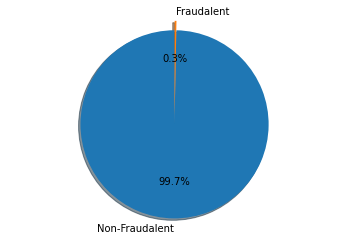

In [19]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.69 % of the dataset
The percentage with churn prediction is  0.31 % of the dataset
The ratio of imbalance is 0.31


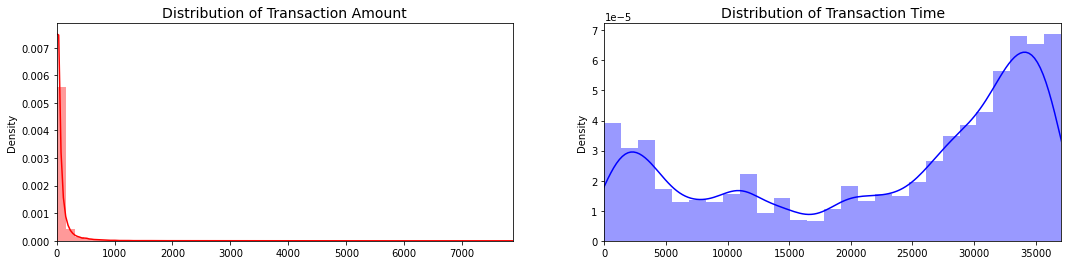

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns comprise of <b>Time</b> and <b>Amount </b>. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

<h3>Summary: </h3> 
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

In [22]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [23]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.894331,-1.249496,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.263548,-1.249496,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.258114,-1.249451,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.510721,-1.249451,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.724849,-1.249406,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the Data (Original DataFrame)
<a id="splitting"></a>
Before proceeding with the <b> Random UnderSampling technique</b> we have to separate the orginal dataframe. <b> Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.</b> The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.  

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.69 % of the dataset
Frauds 0.31 % of the dataset
Train: [ 6593  6594  6595 ... 32997 32998 32999] Test: [   0    1    2 ... 6734 6774 6820]
Train: [    0     1     2 ... 32997 32998 32999] Test: [ 6593  6594  6595 ... 13213 13214 13215]
Train: [    0     1     2 ... 32997 32998 32999] Test: [10497 10498 10568 ... 19822 19823 19824]
Train: [    0     1     2 ... 32997 32998 32999] Test: [14338 15166 15204 ... 26404 26405 26406]
Train: [    0     1     2 ... 26404 26405 26406] Test: [18466 18472 18773 ... 32997 32998 32999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99693182 0.00306818]
[0.99681818 0.00318182]


### SMOTE Technique (Over-Sampling):
<a id="smote"></a>
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800>
<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:  
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.




**References**: 
<ul>
<li><a src="https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation"> 
DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION </a></li> 

<li> <a src="http://rikunert.com/SMOTE_explained "> SMOTE explained for noobs  </a></li>
<li> <a src="https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s"> Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn </a></li>
</ul>

### SMOTE Technique (Over-Sampling):

In [26]:
from imblearn.over_sampling import SMOTE
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy=0.25, random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [28]:
print(original_Xtrain.shape)
print(original_ytrain.shape)
print(Xsm_train.shape)
print(ysm_train.shape)

(26400, 30)
(26400,)
(32898, 30)
(32898,)


In [39]:
from collections import Counter
c = Counter(ysm_train)
print(c)

Counter({0: 26319, 1: 6579})


###  (Under-Sampling):


In [29]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [30]:
def logistic_regression(X_train, y_train): # Logistic Regression 
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
    grid_log_reg.fit(X_train, y_train)
    log_reg = grid_log_reg.best_estimator_ # We automatically get the logistic regression with the best parameters.
    return log_reg

def knn(X_train, y_train): # KNN Classifier
    knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
    grid_knears.fit(X_train, y_train)
    knears_neighbors = grid_knears.best_estimator_ # KNears best estimator
    return knears_neighbors

def svc(X_train, y_train): # Support Vector Classifier
    svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
    grid_svc = GridSearchCV(SVC(), svc_params)
    grid_svc.fit(X_train, y_train)
    svc = grid_svc.best_estimator_ # SVC best estimator
    return svc

def decision_tree(X_train, y_train): # DecisionTree Classifier
    tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4)), "min_samples_leaf": list(range(5,7))}
    grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
    grid_tree.fit(X_train, y_train)
    tree_clf = grid_tree.best_estimator_ # tree best estimator
    return tree_clf

###  Model Execution:

In [32]:
def model_execution(classifiers, X_train, y_train):
    for model in classifiers:
        if classifiers[model]['output'] is None:
            classifiers[model]['output'] = classifiers[model]['function'](X_train, y_train)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


def model_evaluation(classifiers, X_test, y_test):
    # Defining number of columns
    n_cols, n_models = 3, len(classifiers)
    n_rows = math.ceil(n_models/n_cols)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(21, 7*n_rows))

    i, j = 0, 0
    for model in classifiers:
        y_pred = classifiers[model]['output'].predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp = disp.plot(include_values=True, cmap='Blues', ax=ax[i, j])
        disp.ax_.set_title('Confusion Matrix')
    
        # Generate report
        report = classification_report(y_test, y_pred)
        
        ax[i, j].axis('off')
        ax[i, j].set_title(f'{model} Classification Report')
        ax[i, j].annotate(report, xy=(0.1, 0), xytext=(0, -10), xycoords='axes fraction', textcoords='offset pixels', va='top')

        
        if j==n_cols-1: j, i = 0, i+1
        else: j+=1
    
    plt.subplots_adjust(hspace=0.5)
    # plt.subplot_tool()
    plt.show()

### Execute above methods.

In [35]:
print(original_Xtrain.shape)
print(original_ytrain.shape)

(26400, 30)
(26400,)


In [36]:
classifiers = {
    "LogisiticRegression": {'function': logistic_regression, 'output': None},
    "KNearest": {'function': knn, 'output': None},
    "Support Vector Classifier": {'function': svc, 'output': None},
    "DecisionTreeClassifier": {'function': decision_tree, 'output': None}
}

In [37]:
X_train, y_train = original_Xtrain, original_ytrain

In [41]:
model_execution(classifiers, X_train, y_train)

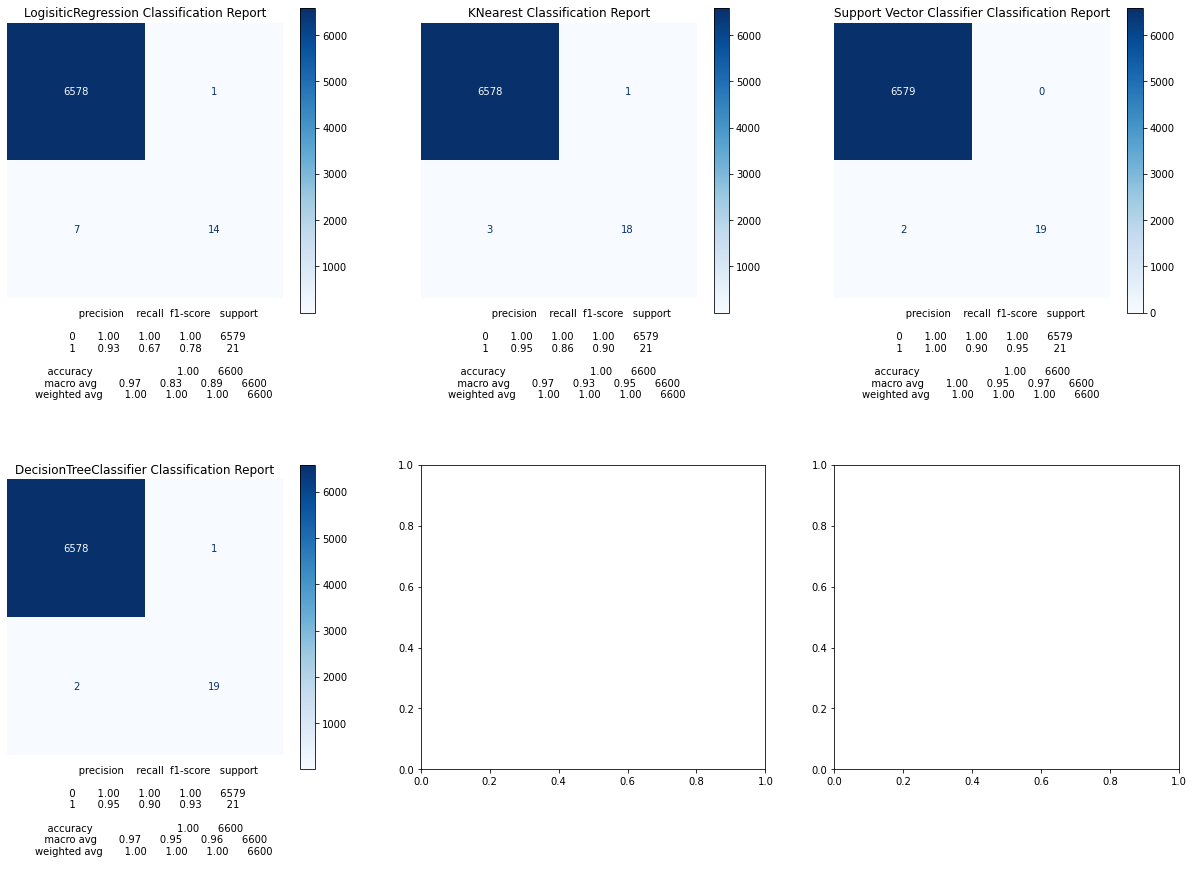

In [99]:
model_evaluation(classifiers, X_test, y_test)